In [79]:
import seaborn as sns
import pandas as pd
from constants import *
import pylab
import pingouin as pg
from scipy.stats import mannwhitneyu

In [38]:
IDEOTYPES = {'T' : 'Telephone',
             'dT' : 'Droopy Telephone', 'DT' : 'Droopy Telephone',
             'C' : 'Christmas Tree', 'CT' : 'Christmas Tree',
             'B' : 'Broomstick'}
CONDITIONS = {'S' : 'Salt', 'C': 'Control'}

In [39]:
pareto_front_df = pd.read_csv('%s/arbor_stats.csv' % STATISTICS_DIR, skipinitialspace=True)
pareto_front_df

,arbor name,pareto front distance,pareto front location
0,087_1_C_day4,1.279848,1.00
1,084_2_C_day2,0.213441,1.00
2,093_1_C_day2,0.447800,1.00
3,078_1_C_day4,0.161652,0.61
4,089_3_S_day4,1.013235,0.70
...,...,...,...
4214,065_3_C_day2,0.125012,0.11
4215,008_4_S_day5,2.675748,0.86
4216,030_3_C_day2,0.399638,0.26
4217,028_4_C_day3,0.391430,0.86


In [40]:
metadata_df = pd.read_csv('%s/metadata.csv' % METADATA_DIR, skipinitialspace=True)
metadata_df['condition'] = metadata_df['condition'].map(CONDITIONS)
metadata_df

,experiment,arbor name,day,Picture #,genotype,replicate,condition
0,PimpiBig4,103_4_S_day5,5,297,103,4,Salt
1,PimpiBig4,031_3_S_day5,5,278,31,3,Salt
2,PimpiBig4,055_2_S_day5,5,151,55,2,Salt
3,PimpiBig4,098_1_S_day5,5,14,98,1,Salt
4,PimpiBig4,101_1_S_day5,5,106,101,1,Salt
...,...,...,...,...,...,...,...
5554,PimpiBig2,139_1_C_day2,2,15,139,1,Control
5555,PimpiBig2,172_3_C_day2,2,150,172,3,Control
5556,PimpiBig2,166_2_S_day3,3,126,166,2,Salt
5557,PimpiBig2,060_2_C_day1,1,42,60,2,Control


In [41]:
ideotypes_df = pd.read_csv('%s/manual_scoring_last_day.csv' % SCORING_DATA_DIR, skipinitialspace=True)
ideotypes_df['ideotype (T/C/B)'].replace('CT', 'C', inplace=True)
ideotypes_df['ideotype (T/C/B)'].replace('DT', 'dT', inplace=True)
ideotypes_df['ideotype'] = ideotypes_df['ideotype (T/C/B)'].map(IDEOTYPES)
ideotypes_df['condition'] = ideotypes_df['condition'].map(CONDITIONS)

In [42]:
ideotypes_df.dropna(subset=['ideotype'], inplace=True)

In [43]:
arbor_stats_df = pd.merge(pareto_front_df, metadata_df)
arbor_stats_df

,arbor name,pareto front distance,pareto front location,experiment,day,Picture #,genotype,replicate,condition
0,087_1_C_day4,1.279848,1.00,PimpiBig3,4,268,87,1,Control
1,084_2_C_day2,0.213441,1.00,PimpiBig3,2,203,84,2,Control
2,093_1_C_day2,0.447800,1.00,PimpiBig3,2,35,93,1,Control
3,078_1_C_day4,0.161652,0.61,PimpiBig4,4,267,78,1,Control
4,089_3_S_day4,1.013235,0.70,PimpiBig3,4,283,89,3,Salt
...,...,...,...,...,...,...,...,...,...
4613,008_4_S_day5,2.675748,0.86,PimpiBig4,5,105,8,4,Salt
4614,030_3_C_day2,0.399638,0.26,PimpiBig4,2,204,30,3,Control
4615,030_3_C_day2,0.399638,0.26,PimpiBig4,2,114,30,3,Control
4616,028_4_C_day3,0.391430,0.86,PimpiBig4,3,192,28,4,Control


In [44]:
last_day_arbors = arbor_stats_df.sort_values('day', ascending=False)
last_day_arbors = last_day_arbors.drop_duplicates(['experiment', 'genotype', 'replicate', 'condition'])
last_day_arbors

,arbor name,pareto front distance,pareto front location,experiment,day,Picture #,genotype,replicate,condition
3195,165_2_S_day5,2.068474,0.46,PimpiBig2,5,97,165,2,Salt
807,029_2_C_day5,1.306401,0.56,PimpiBig4,5,61,29,2,Control
3276,294_2_C_day5,2.638933,0.80,PimpiBig1,5,177,294,2,Control
812,065_3_S_day5,0.467358,0.57,PimpiBig2,5,98,65,3,Salt
811,030_3_S_day5,0.420286,0.54,PimpiBig4,5,41,30,3,Salt
...,...,...,...,...,...,...,...,...,...
1748,286_2_S_day3,0.030175,0.20,PimpiBig1,3,100,286,2,Salt
1693,098_1_C_day3,1.210175,0.00,PimpiBig4,3,215,98,1,Control
1525,195_3_C_day3,0.859156,0.31,PimpiBig1,3,120,195,3,Control
22,234_1_C_day3,0.242350,0.63,PimpiBig3,3,97,234,1,Control


In [45]:
arbor_ideotypes = pd.merge(last_day_arbors, ideotypes_df)
arbor_ideotypes

,arbor name,pareto front distance,pareto front location,experiment,day,Picture #,genotype,replicate,condition,ideotype (T/C/B),size (L/M/S),Sodium gap?,comments extra,ideotype
0,165_2_S_day5,2.068474,0.46,PimpiBig2,5,97,165,2,Salt,C,L,D,half dried up plate,Christmas Tree
1,294_2_C_day5,2.638933,0.80,PimpiBig1,5,177,294,2,Control,T,L,NaN,NaN,Telephone
2,065_3_S_day5,0.467358,0.57,PimpiBig2,5,98,65,3,Salt,T,M,Y,NaN,Telephone
3,229_1_C_day5,4.894434,0.98,PimpiBig3,5,133,229,1,Control,T,M,NaN,NaN,Telephone
4,083_2_C_day5,1.933655,0.17,PimpiBig2,5,64,83,2,Control,C,M,NaN,NaN,Christmas Tree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,286_2_S_day3,0.030175,0.20,PimpiBig1,3,100,286,2,Salt,C,S,Y,infected,Christmas Tree
846,098_1_C_day3,1.210175,0.00,PimpiBig4,3,215,98,1,Control,T,M,NaN,NaN,Telephone
847,195_3_C_day3,0.859156,0.31,PimpiBig1,3,120,195,3,Control,T,M,NaN,infected,Telephone
848,234_1_C_day3,0.242350,0.63,PimpiBig3,3,97,234,1,Control,C,M,NaN,NaN,Christmas Tree


In [46]:
sns.set()

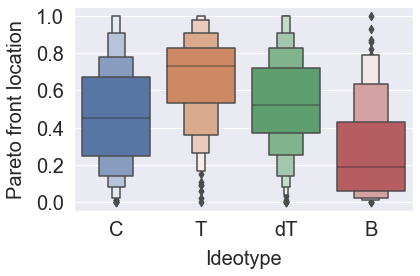

In [47]:
#pylab.figure(figsize=(12.8, 4.8))
sns.boxenplot(x='ideotype (T/C/B)', y='pareto front location', data=arbor_ideotypes)
pylab.xlabel('Ideotype', fontsize=20, labelpad=10)
pylab.ylabel('Pareto front location', fontsize=20, labelpad=10)
pylab.xticks(fontsize=20)
pylab.yticks(fontsize=20)
pylab.tight_layout()
pylab.savefig('%s/alpha_distribution_ideotype.pdf' % LOCATION_ANALYSIS_PLOTS_DIR,
              format='pdf')

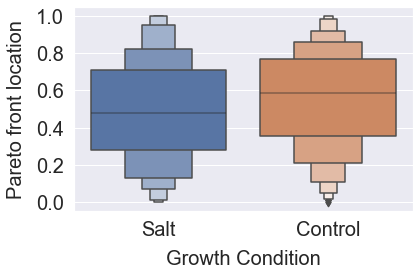

In [48]:
#pylab.figure(figsize=(6.4, 4.8))
sns.boxenplot(x='condition', y='pareto front location', data=arbor_ideotypes)
pylab.xlabel('Growth Condition', fontsize=20, labelpad=10)
pylab.ylabel('Pareto front location', fontsize=20, labelpad=10)
pylab.xticks(fontsize=20)
pylab.yticks(fontsize=20)
pylab.tight_layout()
pylab.savefig('%s/alpha_distribution_condition.pdf' % LOCATION_ANALYSIS_PLOTS_DIR,
              format='pdf')

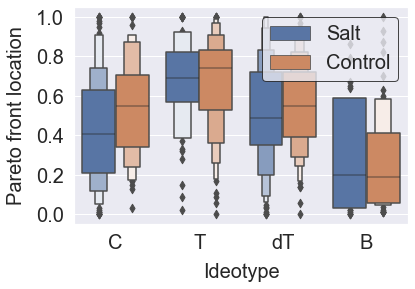

In [49]:
#pylab.figure(figsize=(15, 4.8))
sns.boxenplot(x='ideotype (T/C/B)', y='pareto front location', hue='condition', data=arbor_ideotypes)
pylab.xlabel('Ideotype', fontsize=20, labelpad=10)
pylab.ylabel('Pareto front location', fontsize=20, labelpad=10)
pylab.xticks(fontsize=20)
pylab.yticks(fontsize=20)
pylab.legend(frameon=True, fontsize=20, edgecolor='k', loc='upper right')
pylab.show()

In [50]:
# we need to rename this column with a one word name to play nice with pingouin's N-way ANOVA
arbor_ideotypes['alpha'] = arbor_ideotypes['pareto front location']
pg.anova(data=arbor_ideotypes, dv='alpha', between=['ideotype', 'condition'])

,Source,SS,DF,MS,F,p-unc,np2
0,ideotype,10.033960,3.0,3.344653,54.726728,2.534054e-32,0.163172
1,condition,0.378062,1.0,0.378062,6.186028,1.306891e-02,0.007293
2,ideotype * condition,0.308941,3.0,0.102980,1.685008,1.686826e-01,0.005968
3,Residual,51.459279,842.0,0.061116,NaN,NaN,NaN


In [51]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [56]:
md = smf.mixedlm("alpha ~ ideotype*condition + (1|genotype/replicate)",
                 data=arbor_ideotypes,
                 groups=arbor_ideotypes['genotype'])

In [57]:
mdf = md.fit()

In [58]:
print(mdf.summary())

                          Mixed Linear Model Regression Results
Model:                         MixedLM            Dependent Variable:            alpha   
No. Observations:              850                Method:                        REML    
No. Groups:                    167                Scale:                         0.0492  
Min. group size:               1                  Log-Likelihood:                -25.7588
Max. group size:               11                 Converged:                     Yes     
Mean group size:               5.1                                                       
-----------------------------------------------------------------------------------------
                                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------
Intercept                                       0.276    0.040  6.879 0.000  0.197  0.354
ideotype[T.Christmas Tree]          

In [59]:
pg.normality(data=arbor_ideotypes, dv='alpha', group='ideotype')

,W,pval,normal
Christmas Tree,0.972851,8.733164e-04,False
Telephone,0.941482,1.104546e-07,False
Droopy Telephone,0.984663,7.827017e-04,False
Broomstick,0.862975,2.687211e-07,False


In [61]:
pg.kruskal(data=arbor_ideotypes, dv='alpha', between='ideotype')

,Source,ddof1,H,p-unc
Kruskal,ideotype,3,137.047812,1.636654e-29


In [62]:
import scikit_posthocs as sp

In [69]:
sp.posthoc_mannwhitney(arbor_ideotypes, val_col='alpha', group_col='ideotype')

,Broomstick,Christmas Tree,Droopy Telephone,Telephone
Broomstick,1.000000e+00,1.097326e-08,4.385822e-15,1.076790e-21
Christmas Tree,1.097326e-08,1.000000e+00,4.993426e-03,1.602818e-14
Droopy Telephone,4.385822e-15,4.993426e-03,1.000000e+00,3.633593e-11
Telephone,1.076790e-21,1.602818e-14,3.633593e-11,1.000000e+00


In [70]:
sp.posthoc_mannwhitney(arbor_ideotypes, val_col='alpha', group_col='condition')

,Control,Salt
Control,1.000000,0.000656
Salt,0.000656,1.000000


In [75]:
arbor_ideotypes[['ideotype', 'alpha']].groupby('ideotype').agg(['mean', 'std'])

alpha          
                      mean       std
ideotype                            
Broomstick        0.271667  0.264497
Christmas Tree    0.469323  0.266358
Droopy Telephone  0.532669  0.243850
Telephone         0.668394  0.231997

In [76]:
arbor_ideotypes[['condition', 'alpha']].groupby('condition').agg(['mean', 'std'])

alpha          
               mean       std
condition                    
Control    0.557949  0.264518
Salt       0.495481  0.275529